![https://e.rpp-noticias.io/normal/2015/12/22/285428_50186.jpg](https://e.rpp-noticias.io/normal/2015/12/22/285428_50186.jpg)

**ESCUELA DE INGENIERÍA MECATRÓNICA**

## `PROCESAMIENTO DIGITAL DE SEÑALES E IMÁGENES`

### `Docente: Ms. Ing. Emerson Maximo Asto Rodriguez`

```
Práctica 4: implementación de la convolución
```

## **Practica 4: Implementación de la convolución discreta**

###**4.1. Importación de Librerías**

* **Librerias a utilizar:**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import time
from IPython import display
plt.style.use(['dark_background'])

###**4.2. Cálculo de la convolución usando una funcion de alto nivel**

![https://graphics.stanford.edu/courses/cs178/applets/convolution-equation2-c.jpg](https://graphics.stanford.edu/courses/cs178/applets/convolution-equation2-c.jpg)


![https://qph.fs.quoracdn.net/main-qimg-cb81d3dfbe146b84ebf717ec12722f32.webp](https://qph.fs.quoracdn.net/main-qimg-cb81d3dfbe146b84ebf717ec12722f32.webp)

* **Creación de la señal y el kernel**

In [5]:
# Creando una señal arbitraria
senal1 = np.concatenate( (np.zeros(30), np.ones(2), np.zeros(20), np.ones(30), 2*np.ones(10), np.zeros(30), -np.ones(10), np.zeros(40)), axis=0 )

# Creando el kernel
kernel = np.exp( -np.linspace(-2, 2, 20)**2 ) # Funcion Gaussiana
kernel = kernel/sum(kernel)

N = len(senal1)

* **Mostrando señales creadas**

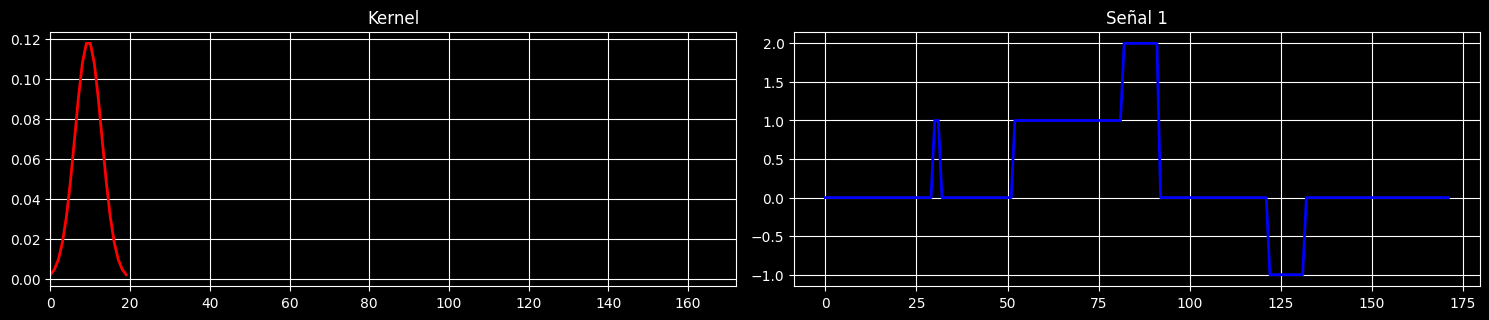

In [6]:
plt.figure(figsize=(15,6))

# Gráfica del kernel
plt.subplot(221)
plt.plot(kernel, 'r', linewidth=2)
plt.xlim([0, N])
plt.title('Kernel')
plt.grid()

# Gráfica de la señal
plt.subplot(222)
plt.plot(senal1, 'b', linewidth=2)
plt.title('Señal 1')
plt.grid()

plt.tight_layout()
plt.show()

 * **Cálculo y gráfica de la convolución**

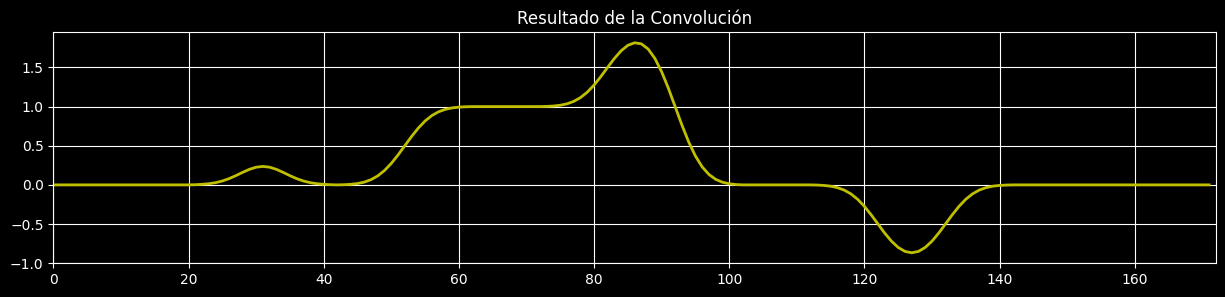

In [9]:
resultado = np.convolve(senal1, kernel, mode='same')

plt.figure(figsize=(15,3))

plt.plot(resultado, 'y', linewidth=2)
plt.xlim([0, N])
plt.title('Resultado de la Convolución')
plt.grid()

plt.show()

###**4.2. Detalles de la convolución**
>*Longitud de la convolución de 2 señales.*

>*Efecto del kernel*

* **Creación de señales y aplicación de la convolución**





In [12]:
# Creando un pulso
senal1 = np.zeros(20)
senal1[8:15] = 1

# Kernel arbitrario
kernel = np.array([1, .8, .6, .4, .2])

# Tamaño de la convolución
nSenal1 = len(senal1)
nKernel = len(kernel)
nConvolucion = nSenal1 + nKernel - 1

# Aplicación de la convolución
resultado = np.convolve(senal1, kernel, mode='full')

* **Graficando resultados**

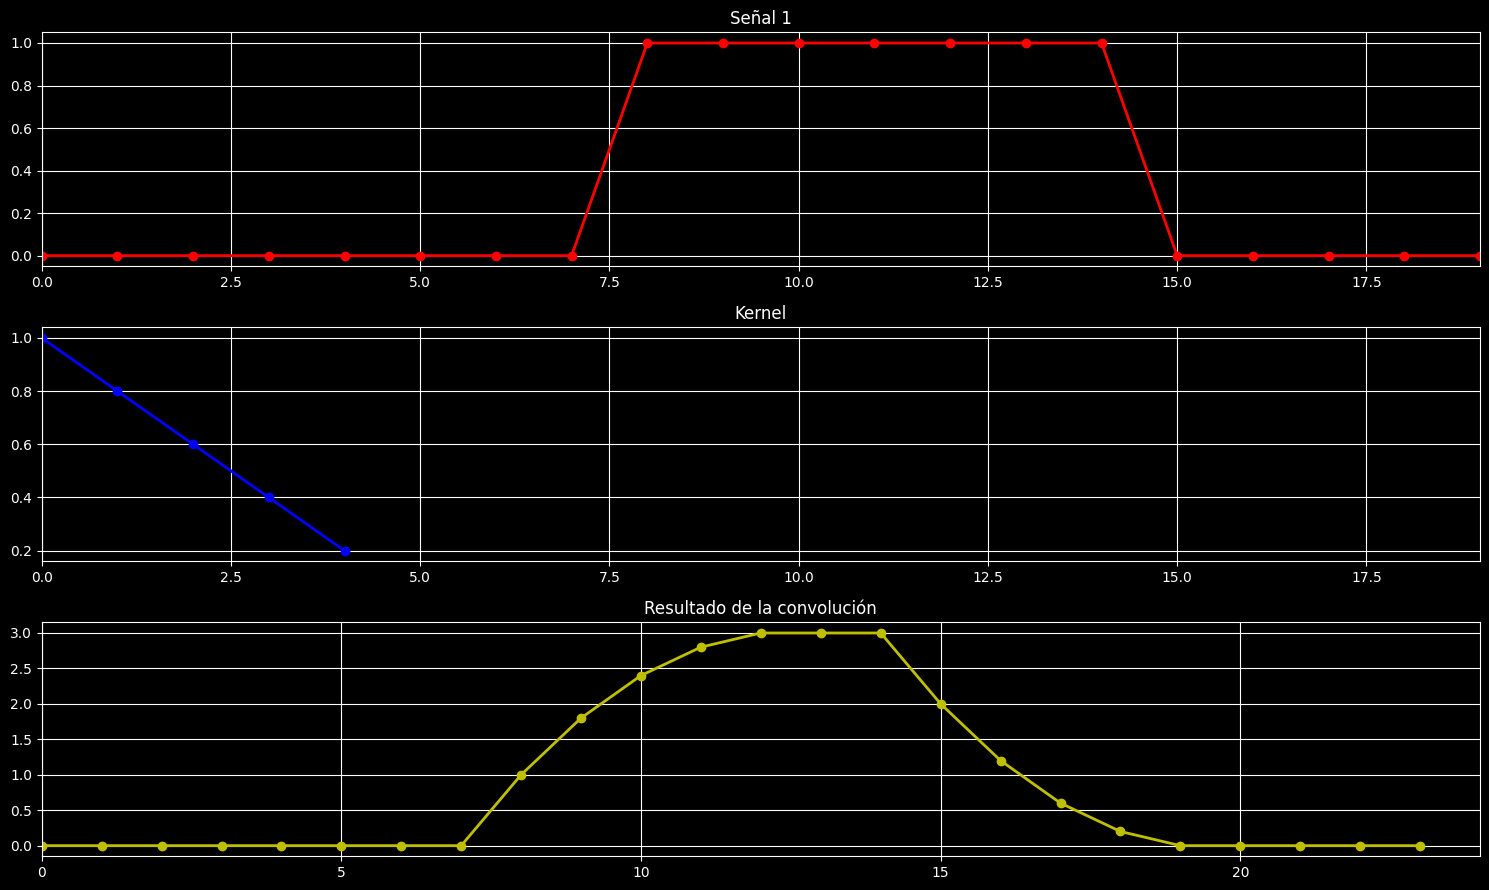

In [14]:
plt.figure(figsize=(15,9))

# Grafica de la señal 1
plt.subplot(311)
plt.plot(senal1, 'ro-', linewidth=2)
plt.xlim([0, nSenal1 - 1])
plt.title('Señal 1')
plt.grid()

# Gráfica del kernel
plt.subplot(312)
plt.plot(kernel, 'bo-', linewidth=2)
plt.xlim([0, nSenal1 - 1])
plt.title('Kernel')
plt.grid()

# Gráfica de los resultados
plt.subplot(313)
plt.plot(resultado, 'yo-', linewidth=2)
plt.xlim([0, nConvolucion])
plt.title('Resultado de la convolución')
plt.grid()

plt.tight_layout()
plt.show()

###**4.3. Animación de la convolución**

*Se usarán las señales creadas en el apartado anterior*

In [15]:
import warnings
warnings.filterwarnings('ignore')

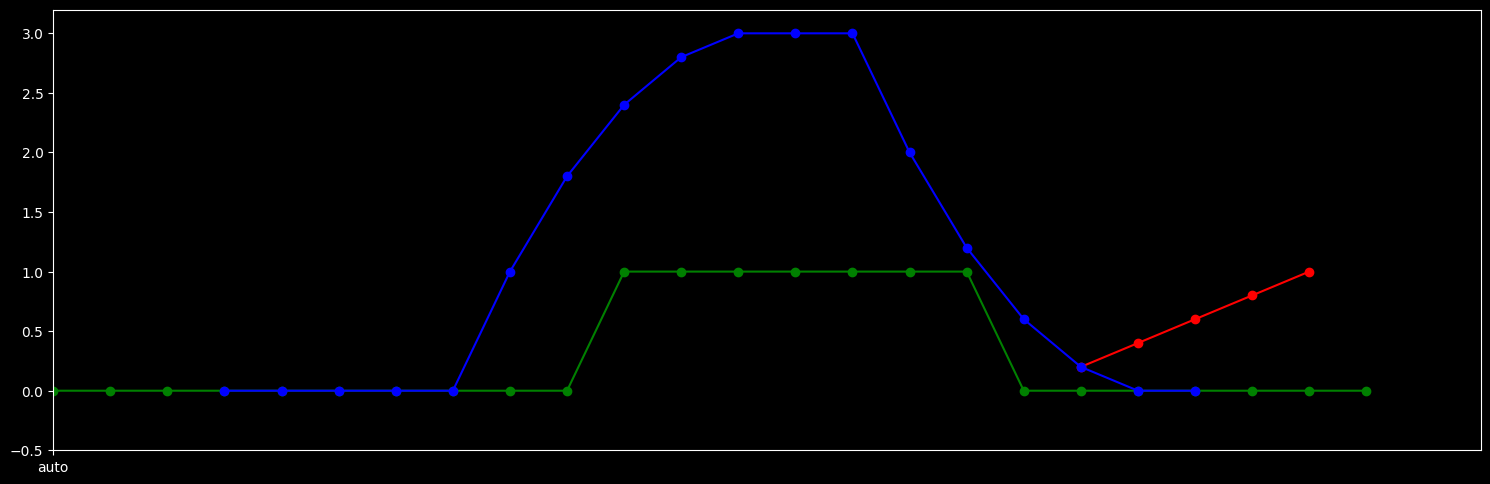

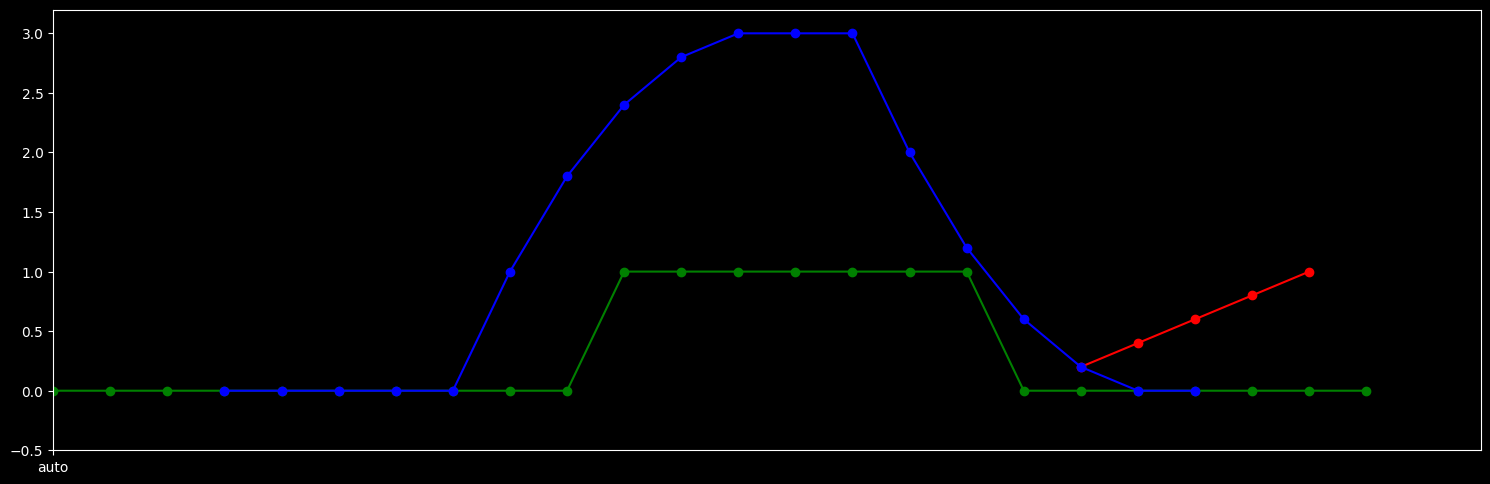

In [17]:
# Calculamos la mitad del kernel
mitad_kernel = int(np.floor(nKernel/2)) # Redondeado hacia abajo


# Invertimos el kernel
kernel_invertido = kernel[::-1]

# Rellenando la señal con 0's para almacenar la salida
senal1_pad = np.concatenate( (np.zeros(mitad_kernel), senal1, np.zeros(mitad_kernel)), axis=0 )

# Vector para almacenar el resultado
conv_resultado = np.zeros(nConvolucion)

# Correr la convolución
plt.figure(figsize=(15,5))

for ti in range(mitad_kernel, nConvolucion - mitad_kernel):

  # Extrayendo una ventana del tamaño del kernel
  ventana = senal1_pad[ti - mitad_kernel : ti + mitad_kernel + 1]

  # Producto punto de la ventana con el kernel invertido
  conv_resultado[ti] = np.dot(ventana, kernel_invertido)

  # Graficando
  plt.cla()
  plt.tight_layout()

  plt.axis(['auto', 'auto', -0.5, 3.2])
  plt.plot(senal1_pad, 'go-')
  plt.plot(np.arange(ti - mitad_kernel - 1, ti + mitad_kernel), kernel_invertido, 'ro-') # Muestra el movimiento del kernel
  plt.plot(np.arange(mitad_kernel + 1, ti), conv_resultado[mitad_kernel+1:ti], 'bo-')
  plt.xlim([0, nConvolucion + 1])

  display.clear_output(wait=True)
  display.display(pl.gcf())

  time.sleep(0.5)

# Recortando los ejes
conv_resultado = conv_resultado[mitad_kernel:-mitad_kernel]

In [20]:
convolve_func = np.convolve(senal1, kernel, mode='same')

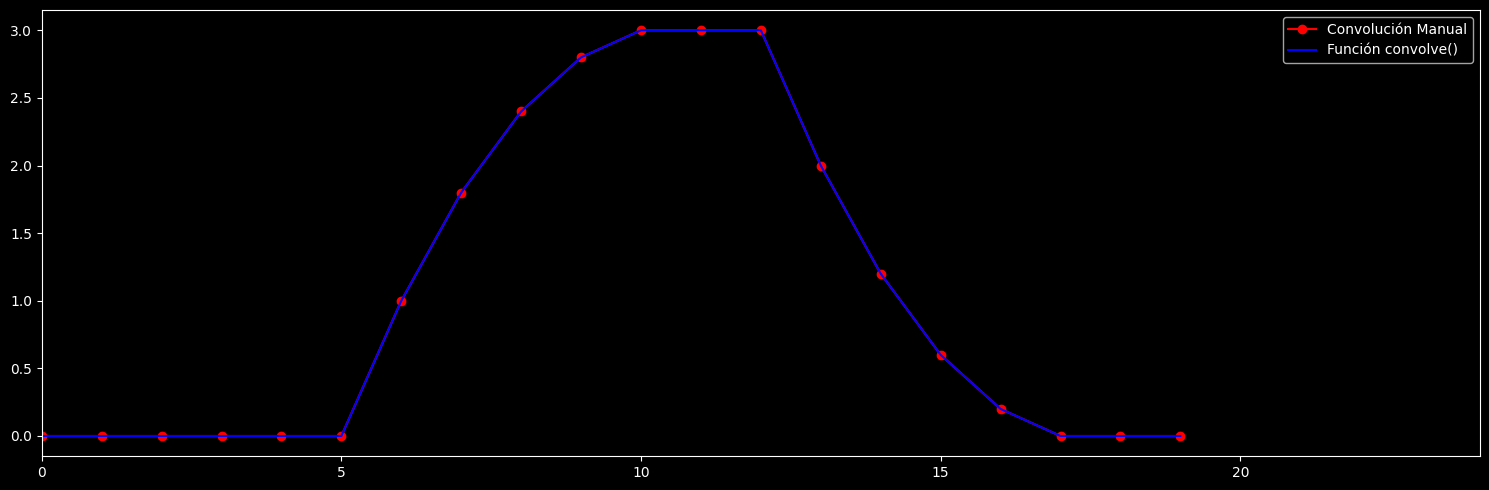

In [21]:
plt.figure(figsize=(15,5))

plt.plot(conv_resultado, 'ro-')
plt.plot(convolve_func, 'b')
plt.xlim([0, nConvolucion])
plt.legend(['Convolución Manual', 'Función convolve()'])

plt.tight_layout()
plt.show()